In [6]:
import pandas as pd
path = r'D:\DataSet\digit_recognizer\train.csv'
data = pd.read_csv(path)
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [7]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier as RFC

In [8]:
RFC_ = RFC(n_estimators=10,random_state=0)

In [9]:
# n_features_to_select是想要选择的特征的个数，step是每次迭代中希望移除的特征个数。
selector = RFE(RFC_,n_features_to_select=340,step=50).fit(x,y)

In [10]:
# support_ 返回所有特征最后是否被选中的布尔矩阵
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,

In [11]:
selector.support_.sum()

340

In [12]:
# ranking_ 返回按照数次迭代过程中每个特征的综合重要性的排名
selector.ranking_

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,
        5,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  4,
        4,  5,  3,  4,  4,  4,  5,  4,  5,  7,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  6,  7,  4,  3,  1,  2,  3,  3,  1,  1,  1,  1,
        1,  3,  3,  4,  5,  5,  5,  8,  8,  9,  9,  9,  9,  8,  9,  9,  4,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  5,  9,  9, 10, 10, 10, 10,  7,  4,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  8, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  4, 10, 10, 10, 10,  9,  7,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  4, 10,  9, 10

In [13]:
x_wrapper = selector.transform(x)

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

0.9379761904761905

In [15]:
#参数的选择 n_features_to_select为多少时，模型的效果最好。
#参数曲线

score =[]
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i,step=50).fit_transform(x,y)
    once = cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(once)


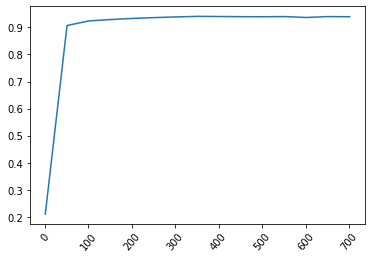

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(1,751,50),score)
plt.xticks(rotation=50)
plt.show()